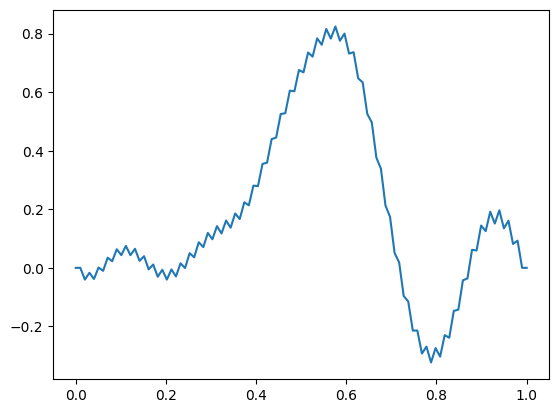

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the domain
N = 100  # Number of grid points
ibd = 2  # Number of boundary points
dx = L / N  # Grid spacing
dt = 0.00000001  # Time step
c = 1.0  # Advection? speed
N_step = 23000
x = np.linspace(0,1,N)

def gaussian_pulse(x, x0=0.5, sigma=0.1, A=1.0):
    return A * np.exp(-((x - x0)**2) / sigma**2)

# Initial condition using tanh function
u0 = np.zeros(N)
u = np.zeros(N)
u_new = np.zeros(N)

# u = 0.5 * (1 + np.tanh(x))
u = gaussian_pulse(x)
u_new = u.copy()

for i in range(N_step):
    for j in range(N):
        if(j>=2 and j<N-2):
            u_new[j] = u[j] - c * dt / (2.0 * dx**3) * (-u[j+2] + 2*u[j+1] - 2*u[j-1] + u[j-2])
        elif(j==1):
            u_new[j] = 0.0 #u[j] - c*dt/(2.0*dx**3) * (-u[j+2]+2*u[j+1]-2*u[j-1])
        elif(j==0):
            u_new[j] = 0.0 #u[j] - c*dt/(2.0*dx**3) * (-u[j+2]+2*u[j+1])
        elif(j==N-1):
            u_new[j] = 0.0 #u[j] - c*dt/(2.0*dx**3) * (-2*u[j-1] + u[j-2])
        elif(j==N-2):
            u_new[j] = 0.0 #u[j] - c*dt/(2.0*dx**3) * (2*u[j+1]-2*u[j-1] + u[j-2])
        
    u = u_new.copy()

plt.plot(x,u)
# plt.xlim(0.2,0.8)
# plt.ylim(0,1)
plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3q/t3cczp251wx1rmlq6xtwc2t00000gn/T/ipykernel_41867/3457380047.py:29: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Evolution of Gaussian pulse under $\partial u / \partial t = -c \partial^3 u / \partial x^3$")


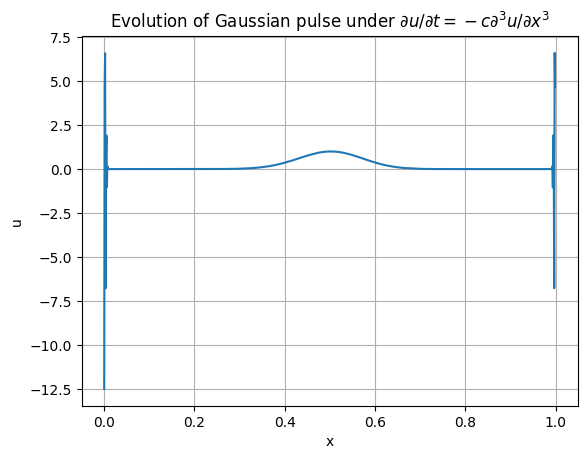

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0
N = 1000
dx = L / N
dt = 0.000001
c = 1.0
N_step = 4
x = np.linspace(0, L, N, endpoint=False)

def gaussian_pulse(x, x0=0.5, sigma=0.1, A=1.0):
    return A * np.exp(-((x - x0)**2) / sigma**2)

# Initial condition
u = gaussian_pulse(x)

# Third-order spatial derivative with periodic BCs
def third_derivative(u, dx):
    return (-np.roll(u, -2) + 2*np.roll(u, -1) - 2*np.roll(u, 1) + np.roll(u, 2)) / (2*dx**3)

# Time integration (Euler)
for i in range(N_step):
    u = u - c * dt * third_derivative(u, dx)

# Plot
plt.plot(x, u)
plt.title("Evolution of Gaussian pulse under $\partial u / \partial t = -c \partial^3 u / \partial x^3$")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()


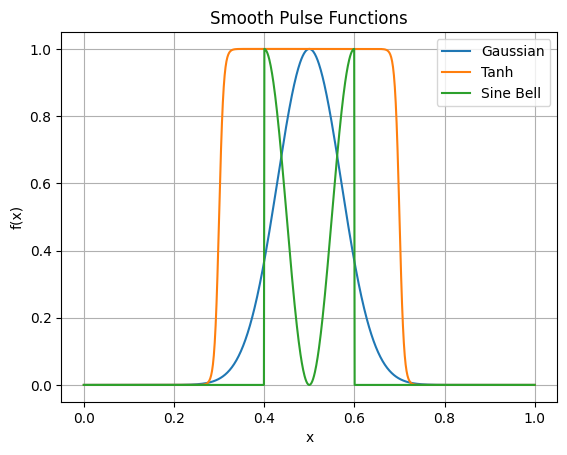

In [14]:
def gaussian_pulse(x, x0=0.5, sigma=0.1, A=1.0):
    return A * np.exp(-((x - x0)**2) / sigma**2)

def tanh_pulse(x, xL=0.3, xR=0.7, delta=0.01, A=1.0):
    return 0.5 * A * (np.tanh((x - xL)/delta) - np.tanh((x - xR)/delta))

def sine_bell_pulse(x, x0=0.5, width=0.2, A=1.0):
    inside = np.abs(x - x0) < (width / 2)
    pulse = np.zeros_like(x)
    pulse[inside] = A * np.sin(np.pi * (x[inside] - x0) / width)**2
    return pulse

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)
plt.plot(x, gaussian_pulse(x), label="Gaussian")
plt.plot(x, tanh_pulse(x), label="Tanh")
plt.plot(x, sine_bell_pulse(x), label="Sine Bell")
plt.legend()
plt.title("Smooth Pulse Functions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()